# LA PNEUMONIE

<img src =./image/pneumonie_schema.jpeg>

La pneumonie est une inflammation des poumons habituellement caus√©e par une infection virale ou bact√©rienne. Lorsque les poumons sont infect√©s, les micro-organismes responsables se multiplient dans les alv√©oles, les petits sacs microscopiques o√π le sang se charge en oxyg√®ne et √©limine le dioxyde de carbone. Celles-ci se remplissent de liquide inflammatoire ou de pus et les √©changes gazeux ont du mal √† se faire. Les pneumonies sont potentiellement graves, notamment lorsqu‚Äôelles touchent des personnes souffrant de maladies chroniques.

Dans la plupart des cas, un seul lobe pulmonaire est atteint (les poumons se composent de cinq lobes) ce qui permet √† la personne malade de ne pas mourir asphyxi√©e.

# 1. Chargement et exploration des donn√©es

1.1 Import des biblioth√®ques

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import cv2
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from pathlib import Path
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
import seaborn as sns
import mlflow
import mlflow.tensorflow
from keras.layers import Activation, Dense
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization, GlobalAveragePooling2D
import random


commande dans un powershell pour lancer un serveur local mlflow pour voir les diff√©rents test de model et leurs performence     
  "mlflow server --host 127.0.0.1 --port 8080"

In [2]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080/")

1.2 Structure du dataset

On remarque qu'il a diff√©rence importante entre les r√©sultat positif(PNEUMONIA) et n√©gatif(NORMAL) il faudra prendre en compte dans l'entrainement du model faire un equilibrage avec les poids

In [3]:
def count_picture_pos(path :str)->int:
    val_neg=0
    val_neg = len(os.listdir(f"{path}/NORMAL"))
    return val_neg

def count_picture_neg(path :str)->int:
    val_pos=0
    val_pos = len(os.listdir(f"{path}/PNEUMONIA"))
    return val_pos
    
test_path="data/chest_xray/test"
train_path="data/chest_xray/train"
val_path="data/chest_xray/val"
path_path=""
doc = ["test","train","val"]
total=0
for dir in doc:
    path=""
    if (dir=="test"):
        path=test_path
    elif(dir=="train"):
        path=train_path
    else:
        path=val_path
        
        
    print(f"Nombre d'image dans le {dir} : {count_picture_pos(path) + count_picture_neg(path) }")
    print(f"Nombre d'image dans le NORMAL : {count_picture_pos(path)}")
    print(f"Nombre d'image dans le PNEUMONIA : {count_picture_neg(path)}")
    total +=count_picture_pos(path) + count_picture_neg(path)
print(f"Nombre d'image total d'image est de : {total}")

Nombre d'image dans le test : 624
Nombre d'image dans le NORMAL : 234
Nombre d'image dans le PNEUMONIA : 390
Nombre d'image dans le train : 5216
Nombre d'image dans le NORMAL : 1341
Nombre d'image dans le PNEUMONIA : 3875
Nombre d'image dans le val : 16
Nombre d'image dans le NORMAL : 8
Nombre d'image dans le PNEUMONIA : 8
Nombre d'image total d'image est de : 5856


1.3 Affichage d‚Äôexemple d‚Äôimage

array([[[40, 40, 40],
        [43, 43, 43],
        [44, 44, 44],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [79, 79, 79]],

       [[41, 41, 41],
        [43, 43, 43],
        [43, 43, 43],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [78, 78, 78]],

       [[41, 41, 41],
        [42, 42, 42],
        [41, 41, 41],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [79, 79, 79]],

       ...,

       [[20, 20, 20],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [23, 23, 23]],

       [[20, 20, 20],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[19, 19, 19],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)

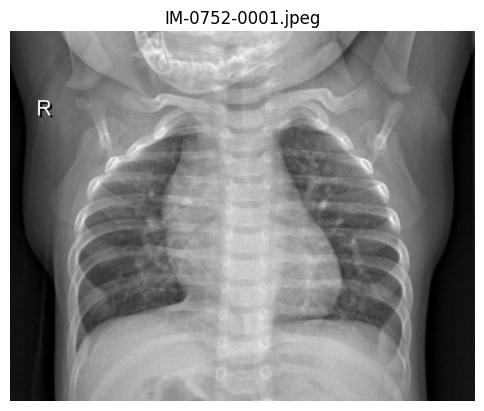

Shape (dimension)  :`(1144, 1438, 3)
Type des valeurs   : uint8


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

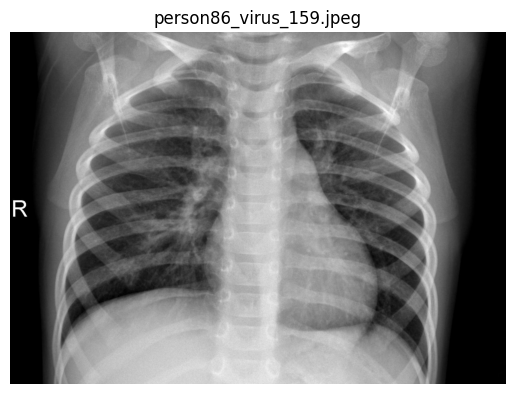

Shape (dimension)  :`(1249, 1758, 3)
Type des valeurs   : uint8


In [4]:
#prend une image al√©atoire en train normal
path="data/chest_xray/train/NORMAL"
filename=random.choice(os.listdir('data/chest_xray/train/NORMAL/'))
img = cv2.imread(f"{path}/{filename}")
display(img)
plt.imshow(img)
plt.title(f"{filename}")
plt.axis("off")
plt.show()

print(f"Shape (dimension)  :`{img.shape}")
print(f"Type des valeurs   : {img.dtype}")
#prend une image al√©atoire en train pneumonia
path="data/chest_xray/train/PNEUMONIA"
filename=random.choice(os.listdir('data/chest_xray/train/PNEUMONIA/'))
img2 = cv2.imread(f"{path}/{filename}")
display(img2)
plt.imshow(img2)
plt.title(f"{filename}")
plt.axis("off")
plt.show()

print(f"Shape (dimension)  :`{img2.shape}")
print(f"Type des valeurs   : {img2.dtype}")


# 2. Pr√©processing

J'ai choisi de travailer avec le model DenseNet121 car il a un taux de pr√©cision est il adapt√© a cette √©tude m√©dical.  
-  Pour le traitement d'image on va utiliser ImageDataGenerator car il est bien adapter pour DenseNet 121.
-  On zoom et change la positionnement de l'image vertical et horizontalement de man√©re al√©atoire pour mieux entranier le model.

In [5]:
# Data Augmentation pour l'entra√Ænement
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # normalisation des pixels
    rotation_range=20,         # tourne l‚Äôimage de ¬±20¬∞
    width_shift_range=0.1,     # d√©place horizontalement de 10%
    height_shift_range=0.1,    # d√©place verticalement de 10%
    shear_range=0.1,           # cisaillement des images
    zoom_range=0.2,            # zoom ¬±20%
    horizontal_flip=True,      # miroir horizontal al√©atoire
    brightness_range=[0.8, 1.2],  # modifie la luminosit√©
    fill_mode='nearest'        # remplit les pixels vides cr√©√©s
)

# 3. Pr√©paration des donn√©es

On choisi de garder les couleurs car il s'adapte bien avec le mod√©le DenseNet121 mais aussi pour raison que de luminosit√© pour que le model d√©tecte mieux les r√©sultat positif.
On change le Batch a 16 au lieux de 32 pour le Val car il a moin d'√©chantillon de donn√© que le Train que test et train

In [ ]:
# Pr√©traitement uniquement pour val/test
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# G√©n√©rateur pour l'entra√Ænement
train_generator = train_datagen.flow_from_directory(
    'data/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)

# G√©n√©rateur pour le test final
test_generator = test_val_datagen.flow_from_directory(
    'data/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

# G√©n√©rateur pour la validation
val_generator = test_val_datagen.flow_from_directory(
    'data/chest_xray/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Il est n√©cessaire de fair eun √©quilibrage au niveau des poids car au niveau des train les positif (Pneumonie) et n√©gatif (Poid) on remarque une diff√©rence d'image cons√©quente.
- Nombre d'image dans le test : 624
- Nombre d'image dans le NORMAL : 234
- Nombre d'image dans le PNEUMONIA : 390

In [7]:
# R√©cup√®re les labels du train
labels = train_generator.classes

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weights_dict= dict(enumerate(class_weights))
print("Class weights:", class_weights)
display(labels)

Class weights: [1.9448173  0.67303226]


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Callback qui permet d'√©viter le overfitting

In [8]:
# === Callbacks ===
checkpoint_path = "best_model.h5"
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-6, monitor='val_loss'),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

# 4. Mod√©le

Entrainement en freeze  
  pr√©-entrainement du model pour que l'entrainement soit plus pr√©cis et plus rapide

In [9]:
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False #freeze

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(units=32, activation="relu"),
    layers.BatchNormalization(),
    Dropout(0.35),
    layers.Dense(units=16, activation="relu"),
    layers.BatchNormalization(),
    Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),                            # adam =M√©thode d‚Äôoptimisation (descente de gradient) rmsprop=la propagation quadratique moyenne
    loss='binary_crossentropy',      # Fonction de perte pour classification multi-classe avec √©tiquettes enti√®res (ex : 0 √† 9)
    metrics=['accuracy'],                         # On surveille l‚Äôexactitude pendant l'entra√Ænement
)

Nombre de param√©tre du model

In [10]:
# R√©sum√© du mod√®le
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ densenet121 (Functional)        ‚îÇ (None, 7, 7, 1024)     ‚îÇ     7,037,504 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d        ‚îÇ (None, 1024)           ‚îÇ             0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)        ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 32)             ‚îÇ        32,800 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 32)             ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 16)             ‚îÇ           528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 16)             ‚îÇ            64 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 16)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 7,071,041 (26.97 MB)

 Trainable params: 33,441 (130.63 KB)

 Non-trainable params: 7,037,600 (26.85 MB)

In [11]:
mlflow.set_experiment("Pneumonia_TransferLearning_CNN")
mlflow.tensorflow.autolog()

In [12]:
history=model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=2,
            class_weight=class_weights_dict,
            callbacks=callbacks
        )


2025/05/28 14:00:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fce3c840585342f3a4b3da7f1188ba0f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2025/05/28 14:00:42 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/05/28 14:00:42 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
c:\simplon dev\python\W6\Transfer_Learning_Pneumonia\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()

Epoch 1/2
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2s/step - accuracy: 0.7304 - loss: 0.4676

163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 343s 2s/step - accuracy: 0.7309 - loss: 0.4669 - val_accuracy: 0.8125 - val_loss: 0.3648 - learning_rate: 0.0010
Epoch 2/2
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2s/step - accuracy: 0.8992 - loss: 0.2346

163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 327s 2s/step - accuracy: 0.8992 - loss: 0.2345 - val_accuracy: 0.8125 - val_loss: 0.2517 - learning_rate: 0.0010


2025/05/28 14:11:56 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2025/05/28 14:11:56 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/28 14:12:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run shivering-rat-284 at: http://127.0.0.1:8080/#/experiments/845456507028104026/runs/fce3c840585342f3a4b3da7f1188ba0f
üß™ View experiment at: http://127.0.0.1:8080/#/experiments/845456507028104026


Entrainement en unfreeze

In [13]:
base_model.trainable = True #unfreeze
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),                            # adam =M√©thode d‚Äôoptimisation (descente de gradient) rmsprop=la propagation quadratique moyenne
    loss='binary_crossentropy',      # Fonction de perte pour classification multi-classe avec √©tiquettes enti√®res (ex : 0 √† 9)
    metrics=['accuracy'],                         # On surveille l‚Äôexactitude pendant l'entra√Ænement
)
mlflow.end_run()

with mlflow.start_run(run_name='densenet121l_V3'):
    history=model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=5,
            class_weight=class_weights_dict,
            callbacks=callbacks
        )
    


2025/05/28 14:12:15 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/05/28 14:12:15 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/5
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8s/step - accuracy: 0.8492 - loss: 0.3799

163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1294s 8s/step - accuracy: 0.8494 - loss: 0.3794 - val_accuracy: 0.9375 - val_loss: 0.1521 - learning_rate: 1.0000e-05
Epoch 2/5
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8s/step - accuracy: 0.9155 - loss: 0.1994

163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1268s 8s/step - accuracy: 0.9155 - loss: 0.1994 - val_accuracy: 1.0000 - val_loss: 0.0974 - learning_rate: 1.0000e-05
Epoch 3/5
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8s/step - accuracy: 0.9283 - loss: 0.1832

163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1248s 8s/step - accuracy: 0.9284 - loss: 0.1831 - val_accuracy: 1.0000 - val_loss: 0.0937 - learning_rate: 1.0000e-05
Epoch 4/5
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2357s 15s/step - accuracy: 0.9305 - loss: 0.1702 - val_accuracy: 1.0000 - val_loss: 0.1463 - learning_rate: 1.0000e-05
Epoch 5/5
163/163 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1279s 8s/step - accuracy: 0.9391 - loss: 0.1578 - val_accuracy: 1.0000 - val_loss: 0.1309 - learning_rate: 1.0000e-05


2025/05/28 16:16:23 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2025/05/28 16:16:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/28 16:16:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run densenet121l_V3 at: http://127.0.0.1:8080/#/experiments/845456507028104026/runs/f3bb54b1bb354e0ba49022c752e57cc5
üß™ View experiment at: http://127.0.0.1:8080/#/experiments/845456507028104026


# 5. Evaluation

In [14]:
loss, acc = model.evaluate(val_generator)
print(f"Accuracy sur le test : {acc*100:.2f}%")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 990ms/step - accuracy: 1.0000 - loss: 0.0937
Accuracy sur le test : 100.00%


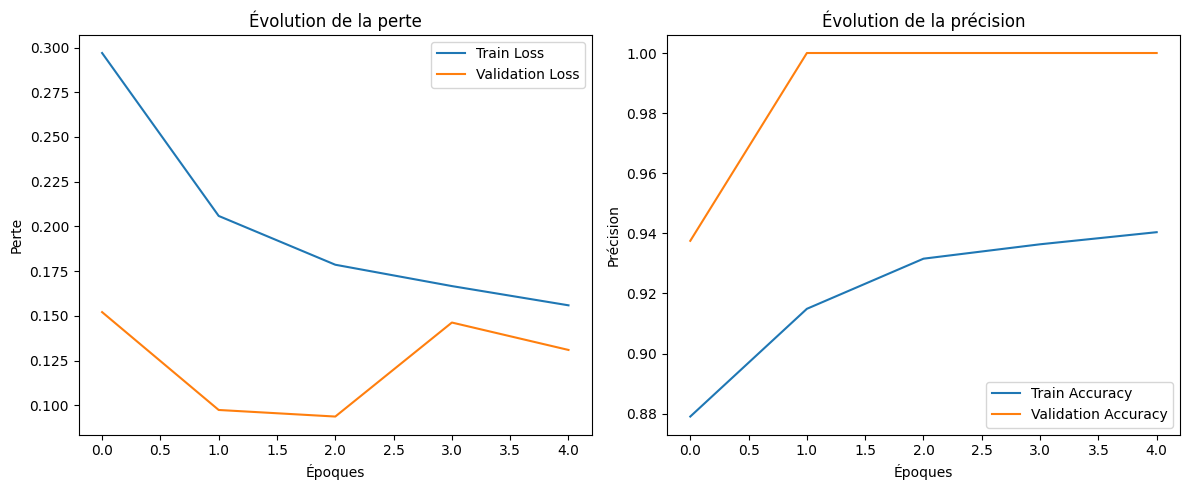

In [ ]:
# --- Courbe de la perte ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("√âvolution de la perte")
plt.xlabel("√âpoques")
plt.ylabel("Perte")
plt.legend()

# --- Courbe de la pr√©cision ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("√âvolution de la pr√©cision")
plt.xlabel("√âpoques")
plt.ylabel("Pr√©cision")
plt.legend()
plt.savefig("./image/courbe_precision_perte2.png")
plt.tight_layout()
plt.show()

# Matrice de confusion prediction sur les tests

20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 2s/step


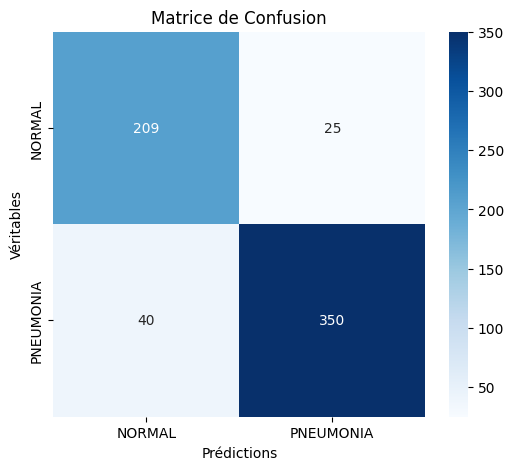


Rapport de classification :
              precision    recall  f1-score   support

      NORMAL       0.84      0.89      0.87       234
   PNEUMONIA       0.93      0.90      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
# √âtape 1 : Pr√©diction
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (Y_pred > 0.5).astype("int32").reshape(-1)  # Pour classification binaire

# √âtape 2 : √âtiquettes vraies
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())  # ['NORMAL', 'PNEUMONIA']

# √âtape 3 : Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# √âtape 4 : Affichage
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.xlabel('Pr√©dictions')
plt.ylabel('V√©ritables')
plt.savefig("./image/confusion_matrix2.png")
plt.show()

print("\nRapport de classification :")
print(classification_report(y_true, y_pred, target_names=class_names))

# Roc / precision prediction sur les tests

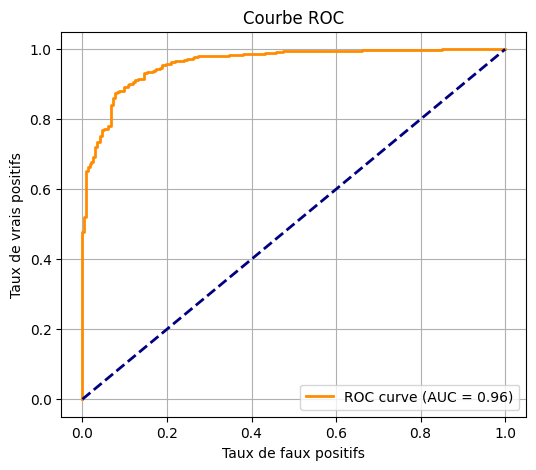

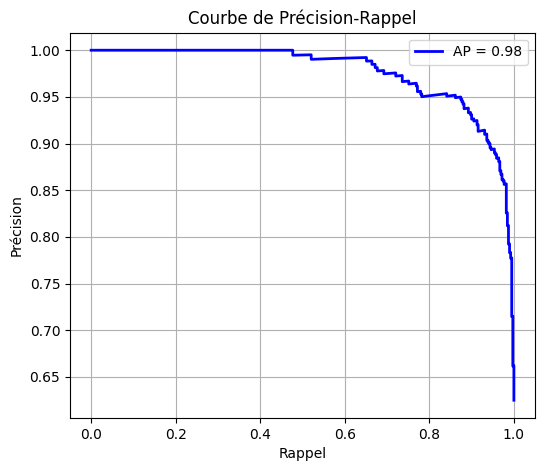

In [19]:
# === ROC ===
fpr, tpr, _ = roc_curve(y_true, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid(True)
roc_path = "./image/roc_curve2.png"
plt.savefig(roc_path)
plt.show()
plt.close()

# === Precision-Recall ===
precision, recall, _ = precision_recall_curve(y_true, Y_pred)
avg_precision = average_precision_score(y_true, Y_pred)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f"AP = {avg_precision:.2f}")
plt.xlabel('Rappel')
plt.ylabel('Pr√©cision')
plt.title('Courbe de Pr√©cision-Rappel')
plt.legend(loc="upper right")
plt.grid(True)
pr_path = "./image/precision_recall_curve2.png"
plt.savefig(pr_path)
plt.show()
plt.close()

mlflow.log_artifact("./image/roc_curve2.png")
mlflow.log_artifact("./image/precision_recall_curve2.png")
mlflow.log_artifact("./image/confusion_matrix2.png")

model.save("model_pneumonia.h5")
mlflow.log_artifact("model_pneumonia.h5")


In [20]:
mlflow.end_run()

üèÉ View run blushing-calf-851 at: http://127.0.0.1:8080/#/experiments/845456507028104026/runs/0489b3acb74045b19e0a7a746e8cf6e4
üß™ View experiment at: http://127.0.0.1:8080/#/experiments/845456507028104026


Image aleatoire avec pr√©diction l'image de gauche est image NORMAL et a droite l'image PNEUMONIE dans le repertoire test du dataset chest xray.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 97ms/step


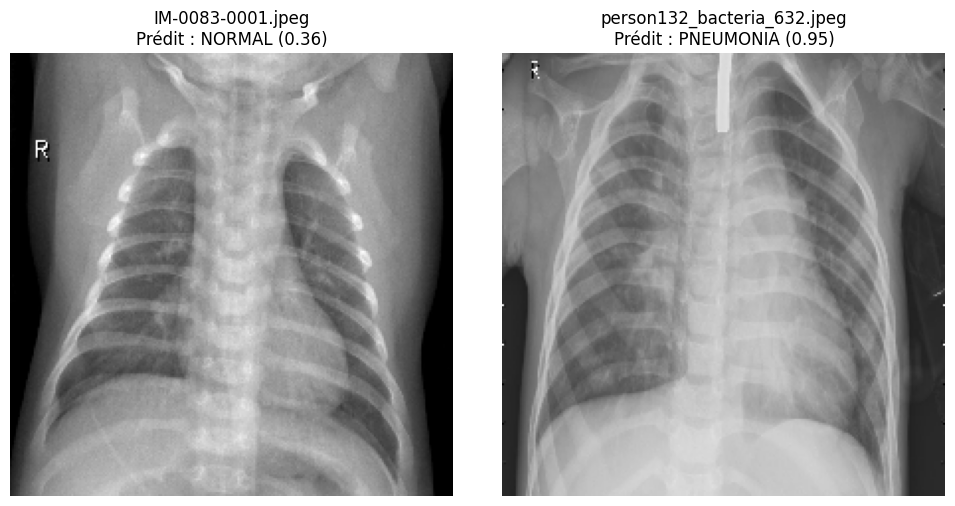

In [21]:
#chemins label image
normal_path = 'data/chest_xray/test/NORMAL'
pneumonia_path = 'data/chest_xray/test/PNEUMONIA'

# S√©lection al√©atoire
normal_img_name = random.choice(os.listdir(normal_path))
pneumonia_img_name = random.choice(os.listdir(pneumonia_path))

# Chargement des images
def load_and_prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Batch size 1
    return img, img_array

# Image 1 : NORMAL
normal_img_fullpath = os.path.join(normal_path, normal_img_name)
normal_img, normal_array = load_and_prepare_image(normal_img_fullpath)

# Image 2 : PNEUMONIA
pneumonia_img_fullpath = os.path.join(pneumonia_path, pneumonia_img_name)
pneumonia_img, pneumonia_array = load_and_prepare_image(pneumonia_img_fullpath)

# Pr√©dictions
pred_normal = model.predict(normal_array)[0][0]
pred_pneumonia = model.predict(pneumonia_array)[0][0]

# Affichage
plt.figure(figsize=(10, 5))

# Image NORMAL
plt.subplot(1, 2, 1)
plt.imshow(normal_img)
plt.title(f"{normal_img_name}\nPr√©dit : {'NORMAL' if pred_normal < 0.5 else 'PNEUMONIA'} ({pred_normal:.2f})")
plt.axis('off')

# Image PNEUMONIA
plt.subplot(1, 2, 2)
plt.imshow(pneumonia_img)
plt.title(f"{pneumonia_img_name}\nPr√©dit : {'NORMAL' if pred_pneumonia < 0.5 else 'PNEUMONIA'} ({pred_pneumonia:.2f})")
plt.axis('off')

plt.tight_layout()
plt.show()

# TARGET

La cellule suivante est le code qui permet de lancer une pr√©duction d'une seul image dans le dossier targetimg.

-  Valeur inf√©rieur a 0.5 = NORMAL (n√©gatif)
-  Valeur sup√©rieur a 0.5 = PNEUMONIA (positif)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 102ms/step


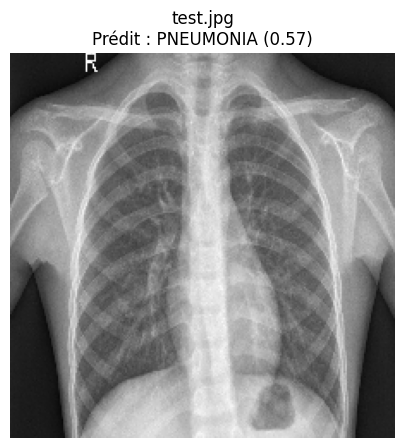

In [22]:
#chemin image
target_path = 'targetimg'

# R√©cup√©rer le nom de l‚Äôunique image dans le dossier
target_img_name = os.listdir(target_path)[0]  #il n‚Äôy a qu‚Äôune image
target_img_fullpath = os.path.join(target_path, target_img_name)

# Fonction de chargement et pr√©paration
def load_and_prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Batch size 1
    return img, img_array

# Charger et pr√©parer l‚Äôimage
img_display, img_array = load_and_prepare_image(target_img_fullpath)

# Pr√©diction
prediction = model.predict(img_array)[0][0]

# Affichage
plt.figure(figsize=(5, 5))
plt.imshow(img_display)
plt.title(f"{target_img_name}\nPr√©dit : {'NORMAL' if prediction < 0.5 else 'PNEUMONIA'} ({prediction:.2f})")
plt.axis('off')
plt.show()